### **Iris Dataset**

In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets

In [17]:
X,y = datasets.load_iris(return_X_y=True, as_frame=True)

In [18]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
X.shape

(150, 4)

In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

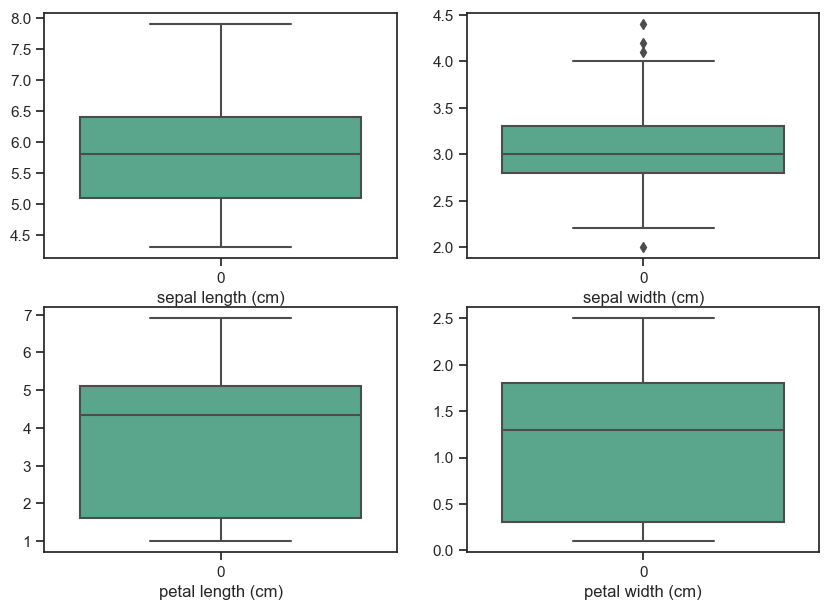

In [25]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.boxplot(X.iloc[:,0],color="#4CB391")
plt.xlabel('sepal length (cm)')

plt.subplot(2,2,2)
sns.boxplot(X.iloc[:,1],color="#4CB391")
plt.xlabel('sepal width (cm)')

plt.subplot(2,2,3)
sns.boxplot(X.iloc[:,2],color="#4CB391")
plt.xlabel('petal length (cm)')

plt.subplot(2,2,4)
sns.boxplot(X.iloc[:,3],color="#4CB391")
plt.xlabel('petal width (cm)')

plt.show()

In [26]:
X['sepal width (cm)'].describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal width (cm), dtype: float64

In [27]:
X_trf = X.copy()

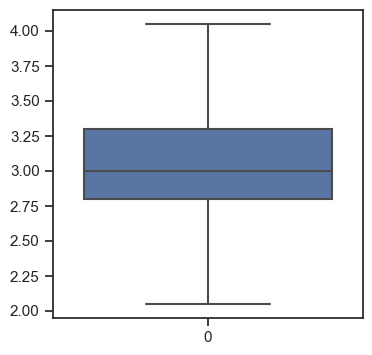

In [31]:
percentile25 = X['sepal width (cm)'].quantile(0.25)
percentile75 = X['sepal width (cm)'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

X_trf['sepal width (cm)'] = np.where(
    X_trf['sepal width (cm)'] > upper_limit,
    upper_limit,
    np.where(X_trf['sepal width (cm)'] < lower_limit,
             lower_limit,
             X_trf['sepal width (cm)'])
)
plt.figure(figsize=(4,4))
sns.boxplot(X_trf['sepal width (cm)'])
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler
trf = StandardScaler()
X_trf1 = trf.fit_transform(X_trf)

In [34]:
X_trf1

array([[-9.00681170e-01,  1.05196091e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.27367465e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.44363887e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  1.08498211e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.28782659e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.99542362e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  8.16095238e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  8.16095238e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.63233141e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  1.08498211e-01, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.52369227e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  8.16095238e-01, -1.22655167e+00,
      

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [42]:
from sklearn.model_selection import cross_validate
score = cross_validate(knn, X,y,cv=5,scoring='accuracy')
score

{'fit_time': array([0.00268626, 0.        , 0.00800467, 0.00552273, 0.00701451]),
 'score_time': array([0.01462555, 0.00800419, 0.0106349 , 0.00931096, 0.01630187]),
 'test_score': array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])}

In [41]:
score['test_score'].mean()

0.9666666666666668

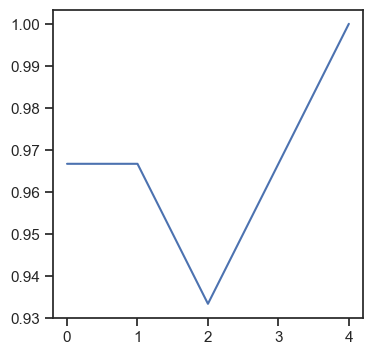

In [44]:
plt.figure(figsize=(4,4))
plt.plot(score['test_score'])
plt.show()